<a href="https://colab.research.google.com/github/lapinRagnar/my-deep-learning-pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Let's explore an example pytorch end-to-end workflow

resources : 
* ground truth notebook : 
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/docs/01_pytorch_workflow.ipynb
* book version of the notebook :
https://www.learnpytorch.io/01_pytorch_workflow/
 


In [1]:
what_were_covering = {
    1: "data (prepare and load) ",
    2: "build model",
    3: "fit the model to data (training) ",
    4: "making predictions and evaluation a model (inference) ",
    5: "saving and loading a model",
    6: "putting it all together"    
}

what_were_covering

{1: 'data (prepare and load) ',
 2: 'build model',
 3: 'fit the model to data (training) ',
 4: 'making predictions and evaluation a model (inference) ',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__


'2.0.0+cu118'

## 1. Data (preparing and loading)

data can be alomost anything... in machine learning.

* excel spreadsheet
* images of any kind
* video (youtube has a lot of data...)
* audio like songs or podcast
* DNA
* text
machine learning is a game of 2 parts:
1. get a data into a numerical representation
2. build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with *known* *parameters*





In [3]:
# create a *known* parameters

weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concept in machine learning in general) 

Let's create a training and test set with our data

In [5]:
# create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [6]:
# visualise our data
def plot_prediction(
    train_data=X_train, 
    train_labels=y_train,
    test_data=X_test,
    test_labels =y_test,
    predictions=None):
  """
  plots training data, test data and compare prediction
  """
  plt.figure(figsize=(10, 7))
  
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14})



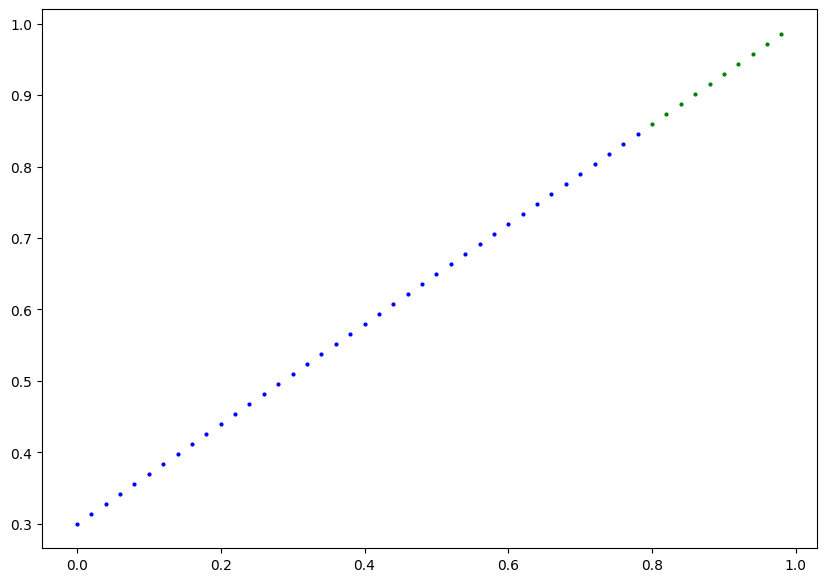

In [7]:
plot_prediction()

## 2. Build model

our first pytorch model!

resources for OOP in python :
https://realpython.com/python3-object-oriented-programming/

what our model does :
* start with random values (weights && bias)
* look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights && bias values we used to create the data)  

how does it do so?

through the main algorithms :
1. gradiant descent
2. back propagation



In [8]:
# Create linear regression model class
import torch
from torch import nn

class LinearRegressionModel(nn.Module):                       ### almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
        1, 
        requires_grad=True,
        dtype=torch.float
        ))
    self.bias = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype=torch.float
    ))

  # forward method to define the computation in the model
  def forward(self, X: torch.Tensor) -> torch.Tensor:         # <- X is the input data
    return self.weights * X + self.bias                       # this is the linear regression formula


### pytorch model building essentials

* torch.nn - contains all of the buildings for computation graphs (a neural networks can be considered a computation graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation

pytorch cheatsheet :
https://pytorch.org/tutorials/beginner/ptcheat.html


### checking the contents of our pytorch model

Now we've created the model, let's see what inside.
So we can check our model parameters or what's inside our model using `.parameters().`


In [9]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making prediction using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predict `y_test` based on `X_test`

when we pass data through our model, it's going to run it through the `forward()` method

In [11]:
# make prediction with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

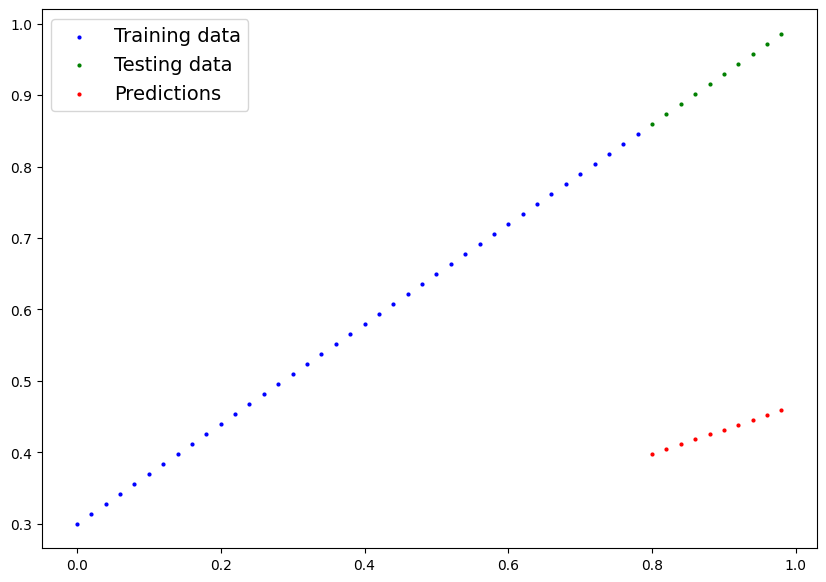

In [13]:
plot_prediction(predictions=y_pred)

## 3. Train model

the whole idea of training is for a model to move from some *unkonown* parameters (these may be the random) to some *known* parameters.

In another words from a poor representation of the data to a better representation.

One way to measure how poor or how wrong your model predictions are, is to use a loss fonction.

* Note : loss function may also be called `cost function` or `criterion` in different areas. For our case, we're going to refer it as a loss function.

Things we need to train :

* **loss fuction :** A function to measure how wrong your model's predictions are to the ideal output, lower is better.

* **Optimizer :** Takes into account the loss of the model and adjusts the model's parameters (e.g. weight && bias values in our case) to improve the loss function.

And specifically for pytorch, we need :

* A trainning loop
* A testing loop 



In [14]:
# check out our medel's parameters (a parameter is a value that the model sets itself)
model_0.parameters()

<generator object Module.parameters at 0x7f55a06f4740>

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# setup a loss function
loss_fn = nn.L1Loss()


# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01,                                            # the most important hyperparameters
    )


### building a training loop (and testing loop) in pytorch

A couple of thing we need in training loop :
0. loop through the data
1. forward pass (this involves data moving through our model's `forward()` functions) to make predictions - also called forward propagation
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimize zero grad
4. loss backward - move back through the network to calculate the gradients of each of parameters of our model with respect of loss (**backpropagation**) 
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [18]:
# an epoch is one loop of the data (it's a hyperparameter because we've set it ourselves)
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### training
# 0. loop to the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()                       # train mode in pytorch sets all parameters that require gradient to require gradient

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (perform the gradient descent)
  optimizer.step()

  # testing
  model_0.eval()                        # turns off gradient tracking 
  
  with torch.inference_mode():
    # a. do the forward pass
    test_pred = model_0(X_test)
    # b. calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  
  # print out what's happing
  if epoch % 10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"epoch: {epoch} | loss : {loss} | test loss : {test_loss}")




  # print out model state_dict()
  # print(model_0.state_dict())

epoch: 0 | loss : 0.31288138031959534 | test loss : 0.48106518387794495
epoch: 10 | loss : 0.1976713240146637 | test loss : 0.3463551998138428
epoch: 20 | loss : 0.08908725529909134 | test loss : 0.21729660034179688
epoch: 30 | loss : 0.053148526698350906 | test loss : 0.14464017748832703
epoch: 40 | loss : 0.04543796554207802 | test loss : 0.11360953003168106
epoch: 50 | loss : 0.04167863354086876 | test loss : 0.09919948130846024
epoch: 60 | loss : 0.03818932920694351 | test loss : 0.08886633068323135
epoch: 70 | loss : 0.03476089984178543 | test loss : 0.0805937647819519
epoch: 80 | loss : 0.03132382780313492 | test loss : 0.07232122868299484
epoch: 90 | loss : 0.02788739837706089 | test loss : 0.06473556160926819
epoch: 100 | loss : 0.024458957836031914 | test loss : 0.05646304413676262
epoch: 110 | loss : 0.021020207554101944 | test loss : 0.04819049686193466
epoch: 120 | loss : 0.01758546568453312 | test loss : 0.04060482233762741
epoch: 130 | loss : 0.014155393466353416 | test l

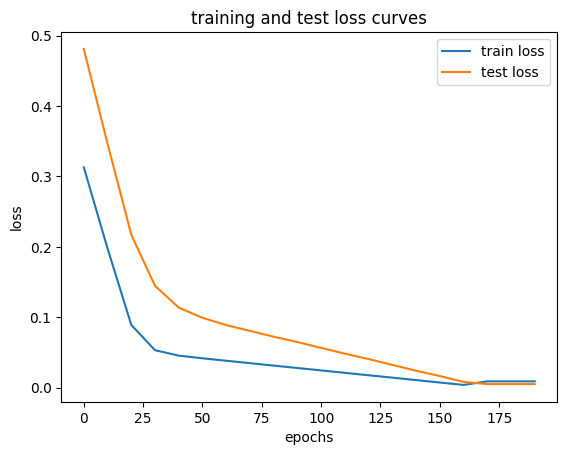

In [19]:
import numpy as np

# plot the losses curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [20]:
# predictions
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [21]:
# the known parameters
weight, bias

(0.7, 0.3)

In [22]:
# the parameters of model_0
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

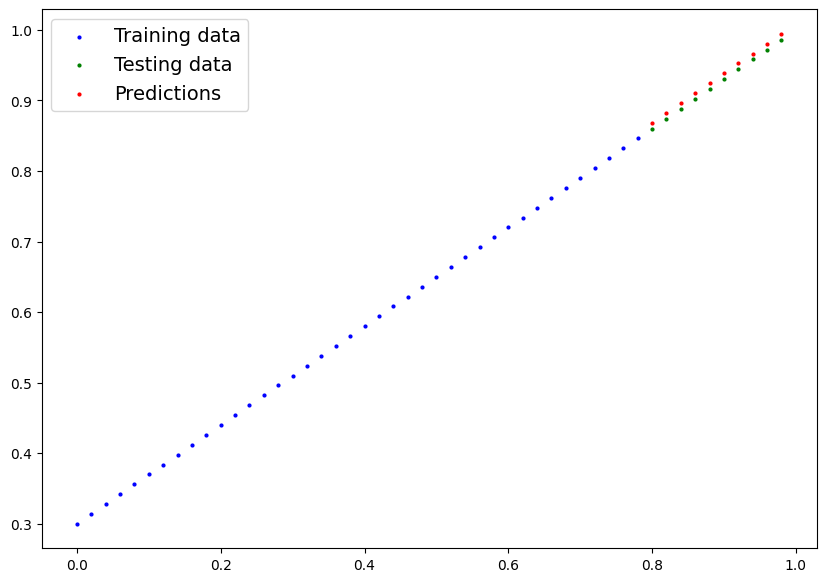

In [23]:
# visualisation
plot_prediction(predictions=y_pred_new)

## 4. Saving a model in pytorch

There are 3 main methods you should know about for saving and loading models in pytorch.

1. `torch.save()` - allows you save a pytorch object in python pickle format
2. `torch.load()` - load a pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [24]:
# saving our pytorch model
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"save the model to : {MODEL_SAVE_PATH} ")
torch.save(
    obj=model_0.state_dict(),
    f=MODEL_SAVE_PATH
    )


save the model to : models/01_pytorch_workflow_model_0.pth 


## 5. Loading a pytorch model

since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance ofour model class and load the state `saved statedict()` into that.

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# to load in a saved state_dict(), we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update a new instance of updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# make a prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds 

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
# compare loaded model preds with original model preds
# y_pred == loaded_model_preds

## 6. Put it all together
let's go back through the steps above and see it in one place.


In [30]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.0+cu118'

create device-agnostic code.

this means if we've got access to a GPU, our code will use it (for potentially faster computing).

if no GPU is available, the code will default to using the CPU.

In [31]:
# setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device} ")


using device : cuda 


In [32]:
!nvidia-smi

Sat May  6 20:17:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1. data

In [33]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start= 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

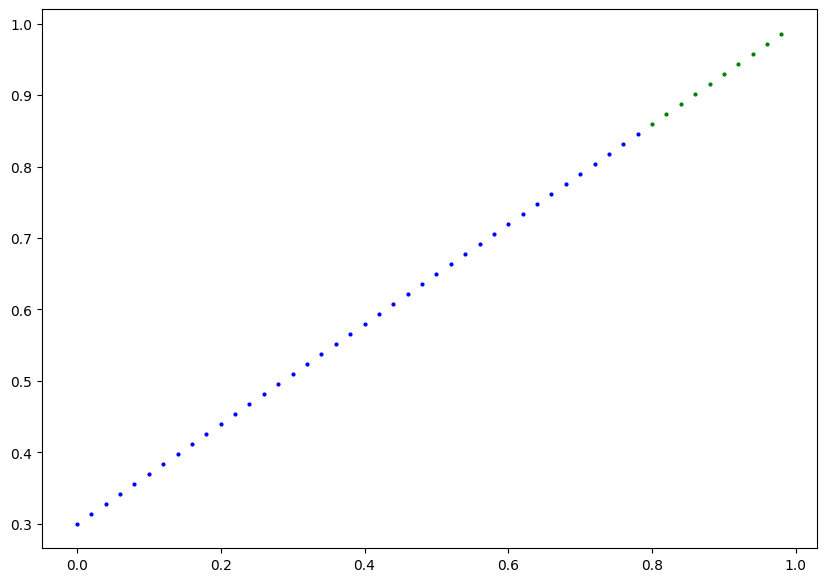

In [35]:
# plot the data
plot_prediction(X_train, y_train, X_test, y_test)

### 6.2 building a pytorch linear model


In [36]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    
    # use nn.Linear() for creating the model parameters / also called : linear transfom, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(
      in_features=1,
      out_features=1
    )

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# check the model current device
next(model_1.parameters()).device 

device(type='cpu')

In [38]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 training 
For training we need :
  * loss function
  * optimizer
  * training loop
  * testing loop

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [40]:
# setup loss function
loss_fn = nn.L1Loss()       # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# let's write a training loop
torch.manual_seed(42)

epochs = 200

# put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
  
  # print out what's happining
  if epoch % 10 == 0:
    print(f"epoch : {epoch} | loss : {loss} | test loss : {test_loss} ")


epoch : 0 | loss : 0.5551779866218567 | test loss : 0.5739762187004089 
epoch : 10 | loss : 0.439968079328537 | test loss : 0.4392664134502411 
epoch : 20 | loss : 0.3247582018375397 | test loss : 0.30455657839775085 
epoch : 30 | loss : 0.20954833924770355 | test loss : 0.16984669864177704 
epoch : 40 | loss : 0.09433845430612564 | test loss : 0.03513690456748009 
epoch : 50 | loss : 0.023886388167738914 | test loss : 0.04784907028079033 
epoch : 60 | loss : 0.019956795498728752 | test loss : 0.045803118497133255 
epoch : 70 | loss : 0.016517987474799156 | test loss : 0.037530567497015 
epoch : 80 | loss : 0.013089174404740334 | test loss : 0.02994490973651409 
epoch : 90 | loss : 0.009653178043663502 | test loss : 0.02167237363755703 
epoch : 100 | loss : 0.006215683650225401 | test loss : 0.014086711220443249 
epoch : 110 | loss : 0.00278724217787385 | test loss : 0.005814164876937866 
epoch : 120 | loss : 0.0012645035749301314 | test loss : 0.013801801018416882 
epoch : 130 | loss 

In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [42]:
weight, bias

(0.7, 0.3)

### 6.4 making and evaluating predictions

In [44]:
# turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

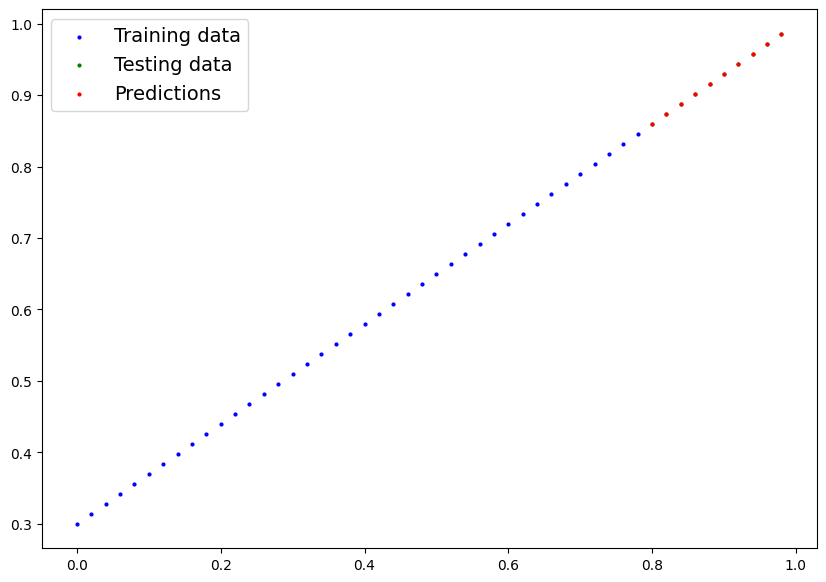

In [45]:
# check out our model prediction visually
plot_prediction(predictions=y_pred.cpu())

### 6.5 saving && loading a trained model

In [48]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to : {MODEL_SAVE_PATH} ")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


saving model to : models/01_pytorch_workflow_model_1.pth 


In [49]:
# load a pytorch

# create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)



LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [50]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])